<a href="https://colab.research.google.com/github/AmaroRegly/Bayery_Munchen_Analysis/blob/main/Budesliga_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data reference: https://www.ogol.com.br/equipe/bayern-munchen?epoca_id=152

##**IMPORTANT**

Based on the analysis, we can see that from 2015 to 2019 Bayern performed below average (both in terms of goals and points). When comparing the data with the template from the reference website, we can see that in these specific seasons, the data is not compatible, however, in the other seasons, the data is real.

#Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Analyst/Datasets/budesliga_dataset - budesliga.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5508 non-null   int64  
 1   MATCH_DATE      5508 non-null   object 
 2   LEAGUE_NAME     5508 non-null   object 
 3   SEASON          5508 non-null   int64  
 4   LEAGUE          5508 non-null   object 
 5   LOCATION        5508 non-null   object 
 6   VIEWER          1682 non-null   float64
 7   MATCHDAY_NR     5508 non-null   int64  
 8   HOME_TEAM_ID    5508 non-null   int64  
 9   HOME_TEAM_NAME  5508 non-null   object 
 10  AWAY_TEAM_ID    5508 non-null   int64  
 11  AWAY_TEAM_NAME  5508 non-null   object 
 12  GOALS_HOME      5508 non-null   int64  
 13  GOALS_AWAY      5508 non-null   int64  
 14  DRAW            5508 non-null   int64  
 15  WIN_HOME        5508 non-null   int64  
 16  WIN_AWAY        5508 non-null   int64  
dtypes: float64(1), int64(10), object(

###Insights
We can see that our dataset has 5508 records, but we need to make some small changes to start working on the analysis.

#Data Cleaning and Data engineering

In [ ]:
#Setting the column to datetime
df1['MATCH_DATE'] = pd.to_datetime(df1['MATCH_DATE'], format='%Y-%m-%d%H:%M:%S')

In [ ]:
#Checking the amount of duplicate data
df1.duplicated().sum()

0

In [ ]:
#Deleting useless columns
df1.drop(columns=['VIEWER'], inplace=True)
df1.drop(columns=['Unnamed: 0'], inplace=True)

##Creating score columns for each match

In [ ]:
#Se win home = 1: +3 pontos para home team e 0 para away team
df1['PTS_HOME'] = df1['WIN_HOME'] * 3
#Se win away = 1: +3 pontos para away team e 0 para home team
df1['PTS_AWAY'] =  df1['WIN_AWAY'] * 3
#Se draw = 1: +1 ponto para home team e away team
df1['PTS_DRAW'] = df1['DRAW'] * 1

#Exploratory Analysis

In [ ]:
#Evaluating the processed data from our dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MATCH_DATE      5508 non-null   datetime64[ns]
 1   LEAGUE_NAME     5508 non-null   object        
 2   SEASON          5508 non-null   int64         
 3   LEAGUE          5508 non-null   object        
 4   LOCATION        5508 non-null   object        
 5   MATCHDAY_NR     5508 non-null   int64         
 6   HOME_TEAM_ID    5508 non-null   int64         
 7   HOME_TEAM_NAME  5508 non-null   object        
 8   AWAY_TEAM_ID    5508 non-null   int64         
 9   AWAY_TEAM_NAME  5508 non-null   object        
 10  GOALS_HOME      5508 non-null   int64         
 11  GOALS_AWAY      5508 non-null   int64         
 12  DRAW            5508 non-null   int64         
 13  WIN_HOME        5508 non-null   int64         
 14  WIN_AWAY        5508 non-null   int64         
 15  PTS_

In [ ]:
#Evaluating the number of seasons
df1['SEASON'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

###Insights
From here, we will analyze Bayern Munchen's performance throughout the seasons, with a greater focus on the 2022 season.

#Bayern goals in 22



In [ ]:
#Total Goals
season = df1['SEASON'] == 2022
jogos22 = df1[season]

bayern22fora = jogos22.query('AWAY_TEAM_NAME == "Bayern München"')
golsfora = bayern22fora['GOALS_AWAY'].sum()

bayern22casa = jogos22.query('HOME_TEAM_NAME == "Bayern München"')
golscasa = bayern22casa['GOALS_HOME'].sum()
total_gols_22 = golscasa + golsfora
total_gols_22


92

In [ ]:
#Goals at Bayern's home
golscasa

53

In [ ]:
#Bayern goals as a visitor
golsfora

39

In [ ]:
#Bayern's goal average in 2022
round(total_gols_22 / len(jogos22['MATCHDAY_NR'].unique()), 2)

2.71

In [ ]:
# Total goals conceded by Bayern in 2022
gols_sofridos_casa = (bayern22fora['GOALS_HOME'].sum()) + (bayern22casa['GOALS_AWAY'].sum())
gols_sofridos_casa

38

#Number of Bayern Wins, Draws and Losses in 22

In [ ]:
jogosbayer = jogos22.query('HOME_TEAM_NAME == "Bayern München" or AWAY_TEAM_NAME == "Bayern München"')

In [ ]:
#Vitórias do Bayer em 2022
vitoriasbayer = (bayer22casa['WIN_HOME'].sum()) + (bayer22fora['WIN_AWAY'].sum())
vitoriasbayer

21

In [ ]:
#Empates do Bayer em 2022
empatebayer = jogosbayer['DRAW'].sum()
empatebayer

8

In [ ]:
#Derrotas do Bayer em 2022
derrotasbayer = (bayer22casa['WIN_AWAY'].sum()) + (bayer22fora['WIN_HOME'].sum())
derrotasbayer

5

#Total de pontos em 22


In [ ]:
#Pontos de vitórias do Bayer em 2022
ptsvictorias = vitoriasbayer * 3
ptsvictorias

63

In [ ]:
#Pontos de empate do Bayer em 2022
ptsempate = empatebayer * 1
ptsempate

8

In [ ]:
jogosbayer.query('HOME_TEAM_NAME == "Bayern München"')['PTS_HOME'].sum() + jogosbayer.query('AWAY_TEAM_NAME == "Bayern München"')['PTS_AWAY'].sum() + jogosbayer['PTS_DRAW'].sum()

71

#Bayern analysis by season

## Bayern's total points per season

In season 2005, Bayern scored 75 points.
In season 2006, Bayern scored 60 points.
In season 2007, Bayern scored 76 points.
In season 2008, Bayern scored 67 points.
In season 2009, Bayern scored 70 points.
In season 2010, Bayern scored 65 points.
In season 2011, Bayern scored 73 points.
In season 2012, Bayern scored 91 points.
In season 2013, Bayern scored 90 points.
In season 2014, Bayern scored 79 points.
In season 2015, Bayern scored 68 points.
In season 2016, Bayern scored 63 points.
In season 2017, Bayern scored 67 points.
In season 2018, Bayern scored 74 points.
In season 2019, Bayern scored 73 points.
In season 2020, Bayern scored 78 points.
In season 2021, Bayern scored 77 points.
In season 2022, Bayern scored 71 points.


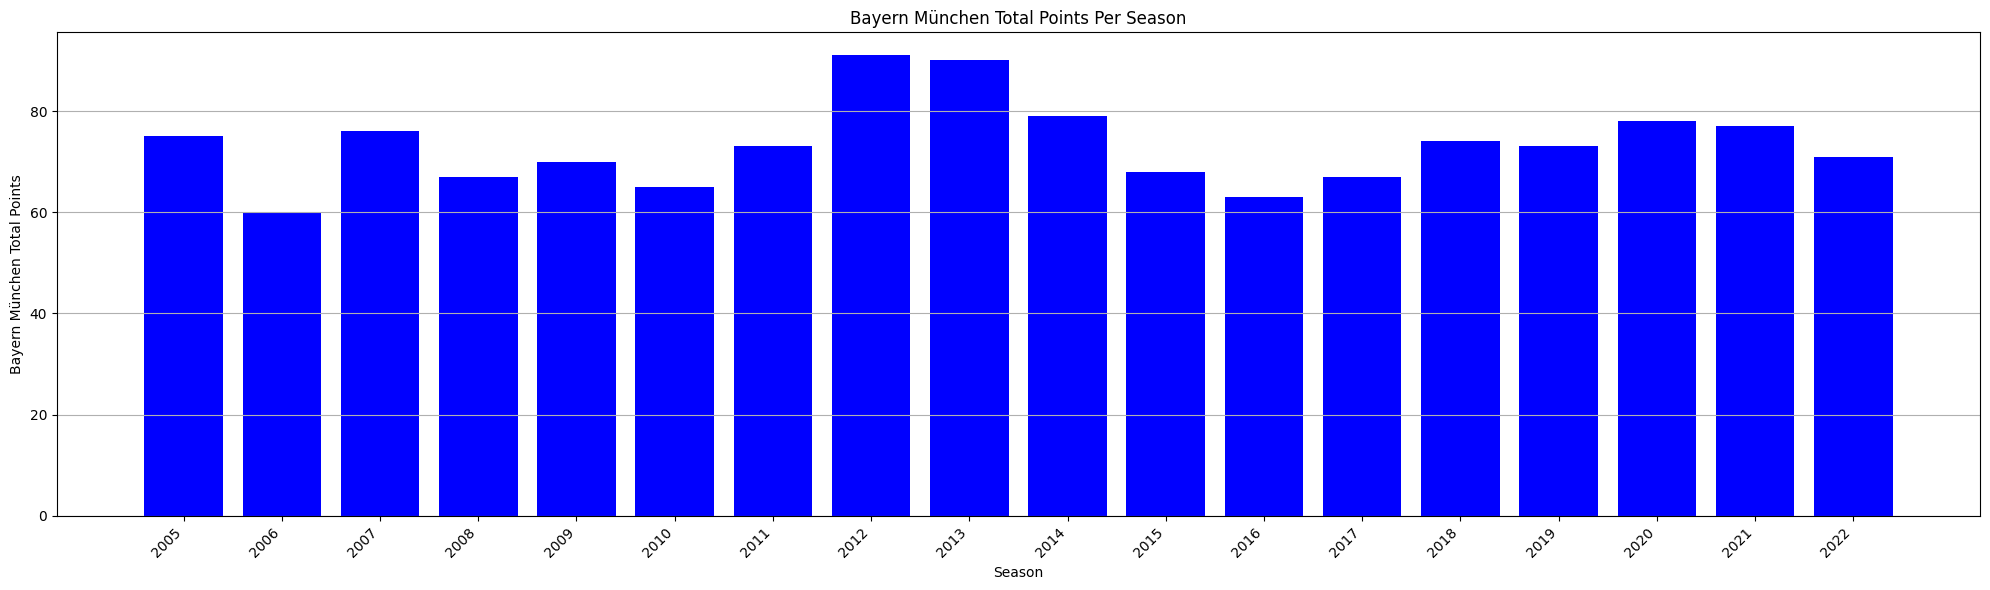

In [ ]:
variavel_ano = df1['SEASON'].unique()
total_pontos = []

for ano in variavel_ano:
  filtro_ano = df1['SEASON'] == ano #Create the filter
  aplicacao_filtro = df1[filtro_ano] #Apply the filter to the main DF
  jogos_bayer_22 = aplicacao_filtro.query('HOME_TEAM_NAME == "Bayern München" or AWAY_TEAM_NAME == "Bayern München"') #I place all Bayern games in the DF

  bayerwin = jogos_bayer_22.query('HOME_TEAM_NAME == "Bayern München" and WIN_HOME == 1 or AWAY_TEAM_NAME == "Bayern München" and WIN_AWAY == 1') #I include all of Bayern's games that they won at home and away in the DF
  bayerdraw = jogos_bayer_22['DRAW']

  pontosbayern22 = (bayerwin['WIN_HOME'].sum() * 3) + (bayerwin['WIN_AWAY'].sum() * 3) + (bayerdraw.sum() * 1) #We add +3 for each win and +1 for each draw to have the total points
  total_pontos.append(pontosbayern22)

  print(f'In season {ano}, Bayern scored {pontosbayern22} points.')

total_pontos

plt.figure(figsize=(20, 6))
plt.bar(variavel_ano, total_pontos, color='blue')
plt.xlabel('Season')
plt.ylabel('Bayern München Total Points')
plt.title('Bayern München Total Points Per Season')
plt.xticks(variavel_ano, rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Bayern's total goals per season

Bayern Münchens total goals in the 2005 season are: 67
Bayern Münchens total goals in the 2006 season are: 55
Bayern Münchens total goals in the 2007 season are: 68
Bayern Münchens total goals in the 2008 season are: 71
Bayern Münchens total goals in the 2009 season are: 72
Bayern Münchens total goals in the 2010 season are: 81
Bayern Münchens total goals in the 2011 season are: 77
Bayern Münchens total goals in the 2012 season are: 98
Bayern Münchens total goals in the 2013 season are: 94
Bayern Münchens total goals in the 2014 season are: 80
Bayern Münchens total goals in the 2015 season are: 27
Bayern Münchens total goals in the 2016 season are: 40
Bayern Münchens total goals in the 2017 season are: 44
Bayern Münchens total goals in the 2018 season are: 41
Bayern Münchens total goals in the 2019 season are: 48
Bayern Münchens total goals in the 2020 season are: 99
Bayern Münchens total goals in the 2021 season are: 97
Bayern Münchens total goals in the 2022 season are: 92


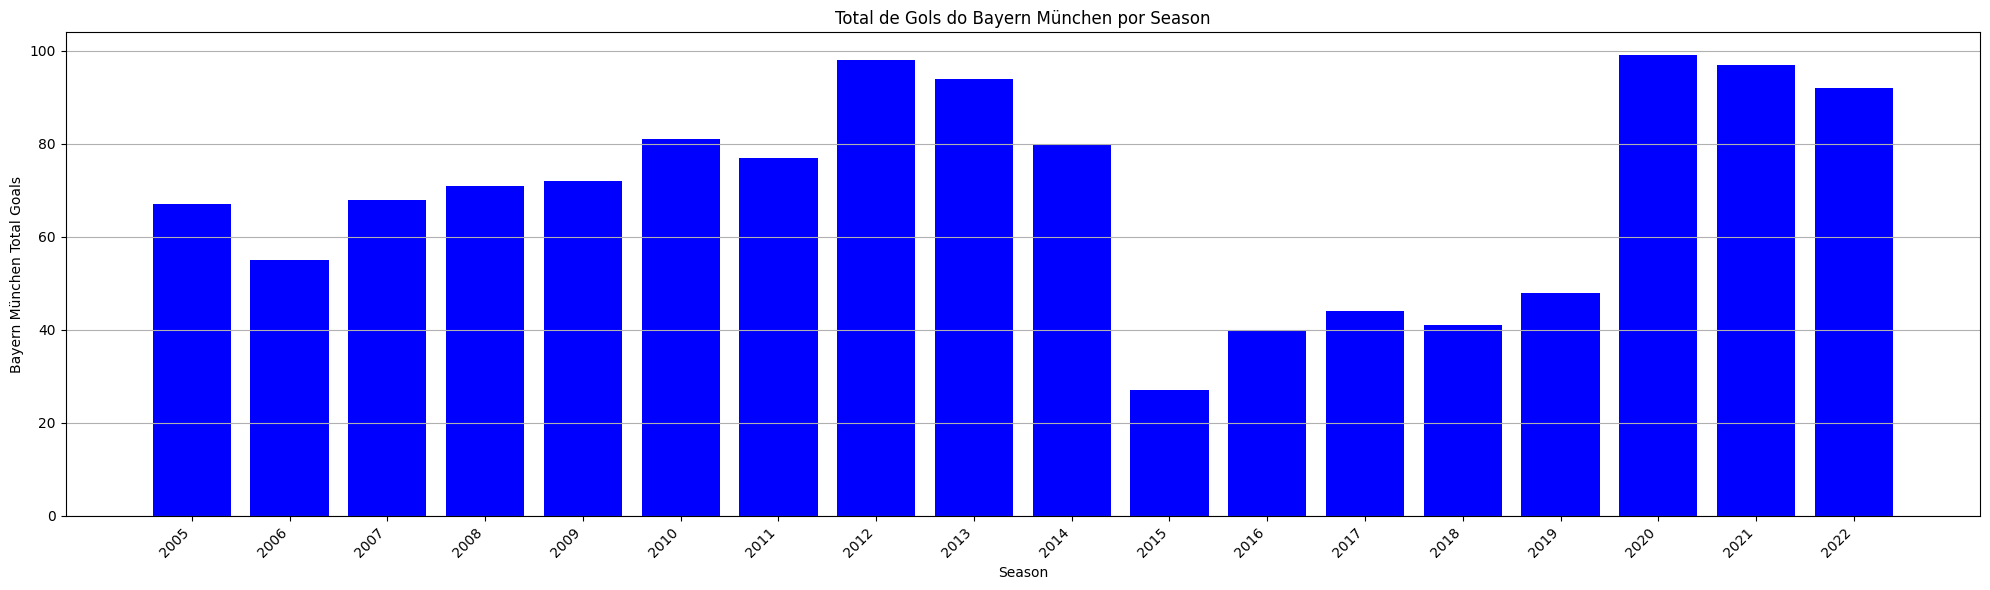

In [ ]:
variavel_ano = df1['SEASON'].unique()
totais_gols = []

for ano in variavel_ano:
  filtro_ano = df1['SEASON'] == ano
  aplicacao_filtro = df1[filtro_ano]

  bayern_fora = aplicacao_filtro.query('AWAY_TEAM_NAME == "Bayern München"')
  gols_fora = bayern_fora['GOALS_AWAY'].sum()

  bayern_home = aplicacao_filtro.query('HOME_TEAM_NAME == "Bayern München"')
  gols_home = bayern_home['GOALS_HOME'].sum()

  goals = gols_fora + gols_home
  totais_gols.append(goals)

  print(f'Bayern Münchens total goals in the {ano} season are: {goals}')

plt.figure(figsize=(20, 6))
plt.bar(variavel_ano, totais_gols, color='blue')
plt.xlabel('Season')
plt.ylabel('Bayern München Total Goals')
plt.title('Total de Gols do Bayern München por Season')
plt.xticks(variavel_ano, rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Maximum goals Bayern scored in a match

The most goals scored by Bayern at HOME in 2005 was 5. And the most goals scored AWAY was 5
The most goals scored by Bayern at HOME in 2006 was 5. And the most goals scored AWAY was 4
The most goals scored by Bayern at HOME in 2007 was 5. And the most goals scored AWAY was 4
The most goals scored by Bayern at HOME in 2008 was 5. And the most goals scored AWAY was 5
The most goals scored by Bayern at HOME in 2009 was 7. And the most goals scored AWAY was 5
The most goals scored by Bayern at HOME in 2010 was 6. And the most goals scored AWAY was 8
The most goals scored by Bayern at HOME in 2011 was 7. And the most goals scored AWAY was 6
The most goals scored by Bayern at HOME in 2012 was 9. And the most goals scored AWAY was 6
The most goals scored by Bayern at HOME in 2013 was 5. And the most goals scored AWAY was 7
The most goals scored by Bayern at HOME in 2014 was 8. And the most goals scored AWAY was 6
The most goals scored by Bayern at HOME in 2015 was 2. And the most goals scored

<Figure size 2000x600 with 0 Axes>

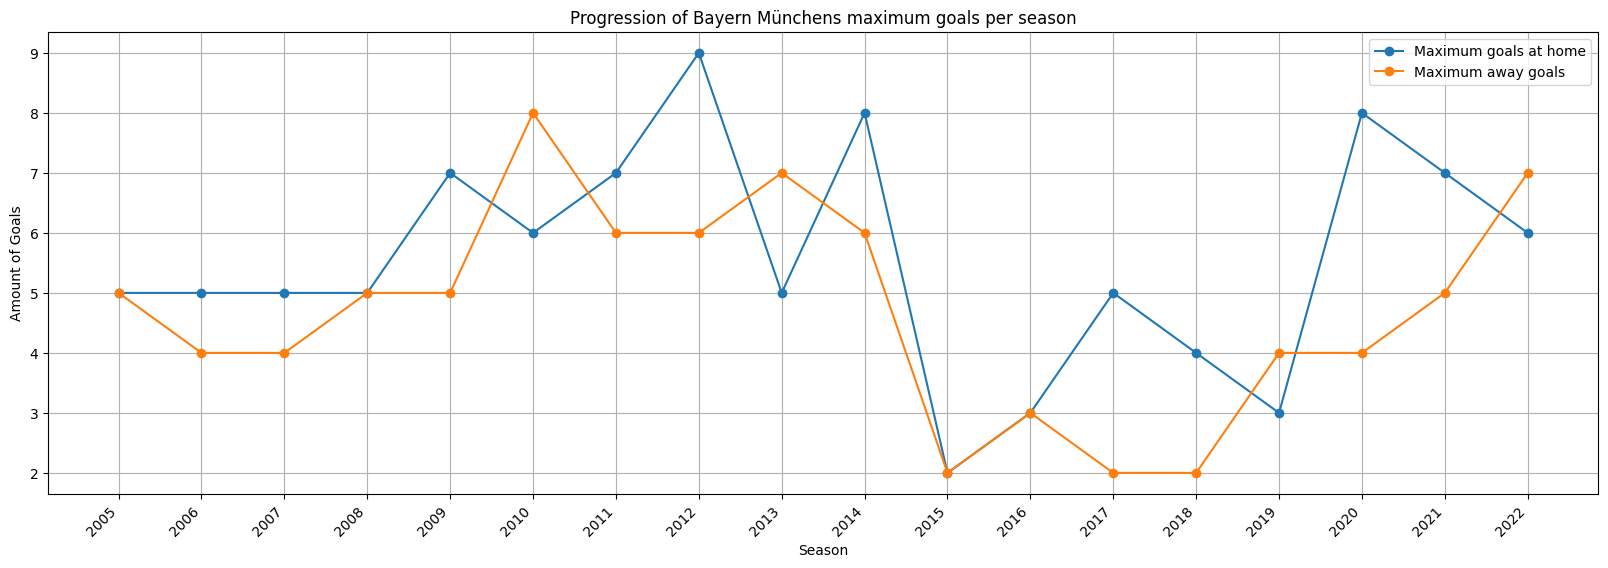

In [ ]:
variavel_ano = df1['SEASON'].unique()
max_gols_casa = []
max_gols_fora = []


for ano in variavel_ano:
  filtro_ano = df1['SEASON'] == ano
  aplicacao_filtro = df1[filtro_ano]
  bayern_matches = aplicacao_filtro.query('HOME_TEAM_NAME == "Bayern München" or AWAY_TEAM_NAME == "Bayern München"')
  max_gols_away = bayern_matches['GOALS_AWAY'].max()
  max_gols_home = bayern_matches['GOALS_HOME'].max()

  max_gols_casa.append(max_gols_home)
  max_gols_fora.append(max_gols_away)

  print(f'The most goals scored by Bayern at HOME in {ano} was {max_gols_home}. And the most goals scored AWAY was {max_gols_away}')

plt.figure(figsize=(20, 6))
fig, varx = plt.subplots(figsize=(20, 6))
varx.plot(variavel_ano, max_gols_casa, marker='o', label='Maximum goals at home')
varx.plot(variavel_ano, max_gols_fora, marker='o', label='Maximum away goals')
varx.set_xlabel('Season')
varx.set_ylabel('Amount of Goals')
plt.grid(axis='y')
plt.grid(axis='x')
varx.set_title('Progression of Bayern Münchens maximum goals per season')
plt.xticks(variavel_ano, rotation=45, ha='right')
varx.legend()
plt.show()

##Bayern games with the highest number of goals (home and away) in 2022

In [ ]:
variavel_ano = df1['SEASON'] == 2022
jogos22 = df1[variavel_ano]
bayern_matches = jogos22.query('HOME_TEAM_NAME == "Bayern München" or AWAY_TEAM_NAME == "Bayern München"')

max_gols_home = bayern_matches['GOALS_HOME'].max()
max_gols_away = bayern_matches['GOALS_AWAY'].max()

#Filtering the games where Bayern München scored the most goals at home
jogos_max_gols_casa = bayern_matches[bayern_matches['GOALS_HOME'] == max_gols_home]

#Filtering the games where Bayern München scored the most away goals
jogos_max_gols_fora = bayern_matches[bayern_matches['GOALS_AWAY'] == max_gols_away]

#Concatenating the DataFrames of the games where Bayern München scored the most goals at home and away
jogos_max_gols = pd.concat([jogos_max_gols_casa, jogos_max_gols_fora])

jogos_max_gols



,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,LOCATION,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,AWAY_TEAM_ID,AWAY_TEAM_NAME,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,PTS_HOME,PTS_AWAY,PTS_DRAW
5302,2022-10-29 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,München,12,40,Bayern München,81,FSV Mainz 05,6,2,0,1,0,3,0,0
5320,2022-11-08 20:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,München,14,40,Bayern München,134,Werder Bremen,6,1,0,1,0,3,0,0
5482,2023-05-13 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,München,32,40,Bayern München,9,Schalke 04,6,0,0,1,0,3,0,0
5228,2022-08-21 17:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Bochum,3,129,VfL Bochum,40,Bayern München,0,7,0,0,1,0,3,0


#In history, which team has Bayern conceded the most goals?

In [ ]:
#Which VISITING team scored the most goals at Bayern?

jogosbayer_home = df1.query('HOME_TEAM_NAME == "Bayern München"')
jogosbayer_away = df1.query('AWAY_TEAM_NAME == "Bayern München"')

jogosbayer_home.groupby('AWAY_TEAM_NAME').GOALS_AWAY.sum().sort_values(ascending=False)


AWAY_TEAM_NAME
Borussia Dortmund           21
Werder Bremen               17
FSV Mainz 05                16
VfB Stuttgart               15
Borussia Mönchengladbach    15
Hertha BSC                  13
Bayer Leverkusen            12
Hamburger SV                10
TSG 1899 Hoffenheim         10
Köln                         9
Schalke 04                   9
VfL Wolfsburg                8
Augsburg                     8
RB Leipzig                   8
Eintracht Frankfurt          7
SC Freiburg                  6
VfL Bochum                   5
Hannover 96                  4
Arminia Bielefeld            4
Fortuna Düsseldorf           3
Nürnberg                     2
Kaiserslautern               2
Energie Cottbus              2
Union Berlin                 1
SpVgg Greuther Fürth         1
Alemannia Aachen             1
SV Darmstadt 98              1
SC Paderborn 07              1
Ingolstadt 04                1
St. Pauli                    0
MSV Duisburg                 0
Hansa Rostock           

In [ ]:
#Which HOUSE team scored the most goals against Bayern?
jogosbayer_away.groupby('HOME_TEAM_NAME').GOALS_HOME.sum().sort_values(ascending=False)

HOME_TEAM_NAME
Borussia Mönchengladbach    24
VfL Wolfsburg               20
FSV Mainz 05                19
Bayer Leverkusen            17
Borussia Dortmund           17
VfB Stuttgart               14
TSG 1899 Hoffenheim         13
Werder Bremen               13
Hertha BSC                  12
Eintracht Frankfurt         12
Hannover 96                 10
SC Freiburg                 10
Schalke 04                   9
Augsburg                     9
Köln                         9
Nürnberg                     8
Hamburger SV                 8
VfL Bochum                   7
RB Leipzig                   6
Arminia Bielefeld            4
Union Berlin                 4
MSV Duisburg                 3
Kaiserslautern               3
Energie Cottbus              3
SpVgg Greuther Fürth         1
St. Pauli                    1
Alemannia Aachen             1
Ingolstadt 04                1
Hansa Rostock                1
Karlsruher SC                1
SV Darmstadt 98              0
SC Paderborn 07         

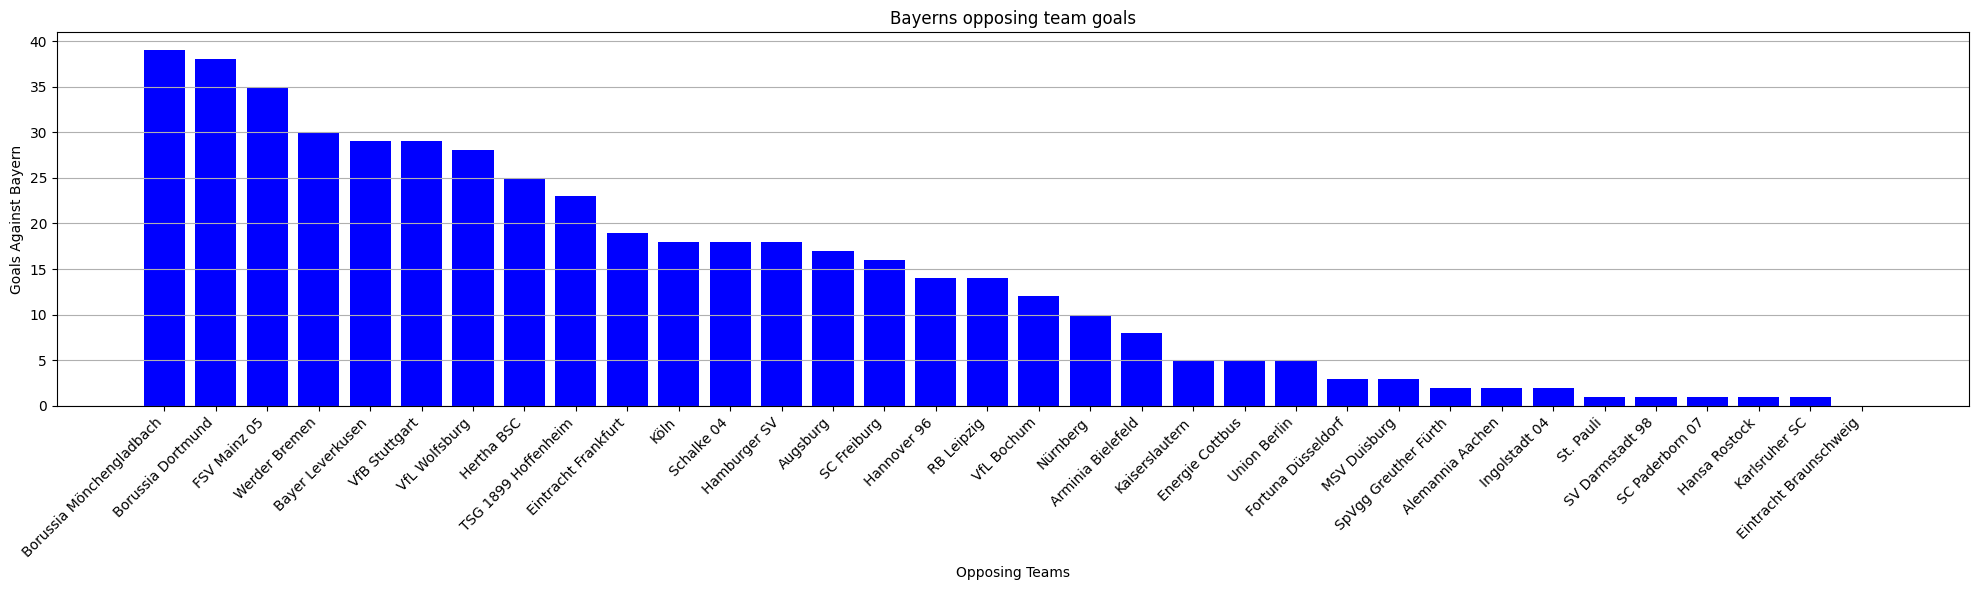

In [ ]:
#Calculate total goals by opposing team
total_gols_por_time = jogosbayer_home.groupby('AWAY_TEAM_NAME')['GOALS_AWAY'].sum() + jogosbayer_away.groupby('HOME_TEAM_NAME')['GOALS_HOME'].sum()
total_gols_por_time = total_gols_por_time.sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(total_gols_por_time.index, total_gols_por_time, color='blue')  #Use the DataFrame indices as the x-axis labels
plt.xlabel('Opposing Teams')
plt.ylabel('Goals Against Bayern')
plt.title('Bayerns opposing team goals')
plt.xticks(rotation=45, ha='right')  #Adjust rotation of x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
total_gols_por_time

AWAY_TEAM_NAME
Borussia Mönchengladbach    39
Borussia Dortmund           38
FSV Mainz 05                35
Werder Bremen               30
Bayer Leverkusen            29
VfB Stuttgart               29
VfL Wolfsburg               28
Hertha BSC                  25
TSG 1899 Hoffenheim         23
Eintracht Frankfurt         19
Köln                        18
Schalke 04                  18
Hamburger SV                18
Augsburg                    17
SC Freiburg                 16
Hannover 96                 14
RB Leipzig                  14
VfL Bochum                  12
Nürnberg                    10
Arminia Bielefeld            8
Kaiserslautern               5
Energie Cottbus              5
Union Berlin                 5
Fortuna Düsseldorf           3
MSV Duisburg                 3
SpVgg Greuther Fürth         2
Alemannia Aachen             2
Ingolstadt 04                2
St. Pauli                    1
SV Darmstadt 98              1
SC Paderborn 07              1
Hansa Rostock           

#Em 22, qual time o Bayern mais levou gol?

In [ ]:

gols_adversarios_22 = jogos_bayer_22.groupby('AWAY_TEAM_NAME')['GOALS_AWAY'].sum() + jogos_bayer_22.groupby('HOME_TEAM_NAME')['GOALS_HOME'].sum()
gols_adversarios_22 = gols_adversarios_22.sort_values(ascending=False)
gols_adversarios_22

AWAY_TEAM_NAME
Bayern München              92
FSV Mainz 05                 5
Augsburg                     4
Borussia Mönchengladbach     4
RB Leipzig                   4
Borussia Dortmund            4
VfB Stuttgart                3
Eintracht Frankfurt          2
Hertha BSC                   2
Köln                         2
Bayer Leverkusen             2
VfL Wolfsburg                2
Werder Bremen                2
TSG 1899 Hoffenheim          1
Union Berlin                 1
SC Freiburg                  0
Schalke 04                   0
VfL Bochum                   0
dtype: int64

In [ ]:
adversario_bayern

,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,LOCATION,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,AWAY_TEAM_ID,AWAY_TEAM_NAME,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,PTS_HOME,PTS_AWAY,PTS_DRAW
5202,2022-08-05 20:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Frankfurt,1,91,Eintracht Frankfurt,40,Bayern München,1,6,0,0,1,0,3,0
5203,2022-08-06 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Augsburg,1,95,Augsburg,112,SC Freiburg,0,4,0,0,1,0,3,0
5204,2022-08-06 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Bochum,1,129,VfL Bochum,81,FSV Mainz 05,1,2,0,0,1,0,3,0
5205,2022-08-06 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Gladbach,1,87,Borussia Mönchengladbach,175,TSG 1899 Hoffenheim,3,1,0,1,0,3,0,0
5206,2022-08-06 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Berlin,1,80,Union Berlin,54,Hertha BSC,3,1,0,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,2023-05-27 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Köln,34,65,Köln,40,Bayern München,1,2,0,0,1,0,3,0
5504,2023-05-27 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Leipzig,34,1635,RB Leipzig,9,Schalke 04,4,2,0,1,0,3,0,0
5505,2023-05-27 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Stuttgart,34,16,VfB Stuttgart,175,TSG 1899 Hoffenheim,1,1,1,0,0,0,0,1
5506,2023-05-27 15:30:00,Fußball-Bundesliga 2022/2023,2022,bl1,Berlin,34,80,Union Berlin,134,Werder Bremen,1,0,0,1,0,3,0,0


#In every season, which team has Bayern lost the most?

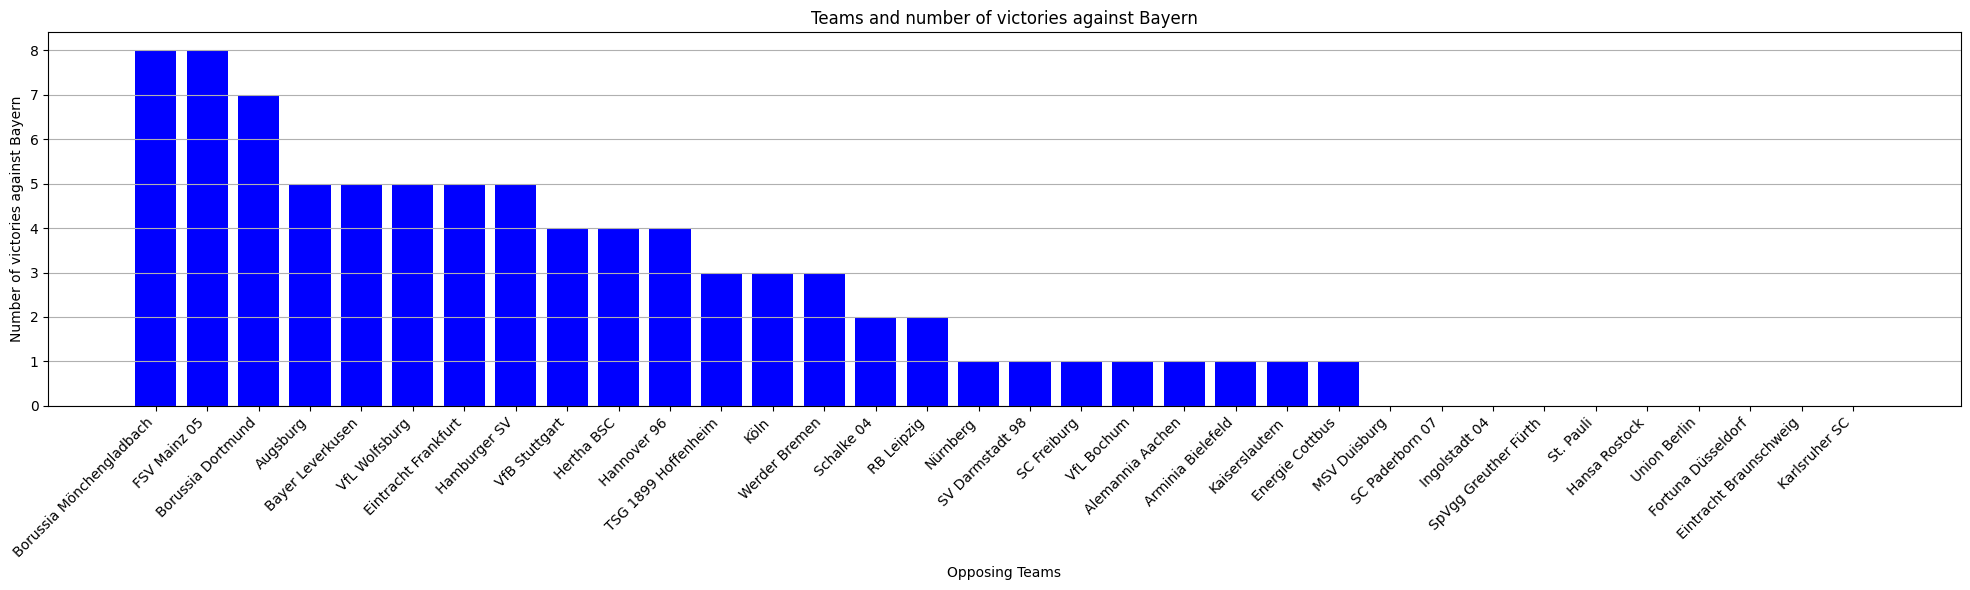

In [ ]:
rival_victory = jogosbayer_home.groupby('AWAY_TEAM_NAME')['WIN_AWAY'].sum() + jogosbayer_away.groupby('HOME_TEAM_NAME')['WIN_HOME'].sum()
rival_victory = rival_victory.sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(rival_victory.index, rival_victory, color='blue')  #Use the DataFrame indices as the x-axis labels
plt.xlabel('Opposing Teams')
plt.ylabel('Number of victories against Bayern')
plt.title('Teams and number of victories against Bayern')
plt.xticks(rotation=45, ha='right')  #Adjust rotation of x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###Insights
Based on the data, we can say that the 3 teams that Bayern Munchen loses the most are: Borrusia Moncheglabach, FSV Mainz and Borrusia Dortmund. In other words, in games against these teams, it is important to pay special attention to our defense.

##Final Insights

* According to our data, Borrusia Monchegladbach, Borrusia Dortmund and FSV Mainz were the teams that scored the most goals against Bayern Munchen. Based on this analysis, it is recommended to reinforce the defense in games against these teams.

* We can notice that there is a relationship between the teams that scored the most goals against Bayern Munchen and the teams that Bayern Munchen lost the most.